## **Network Intrusion Detection Using Logistic Regression on the UNSW-NB15 Dataset**
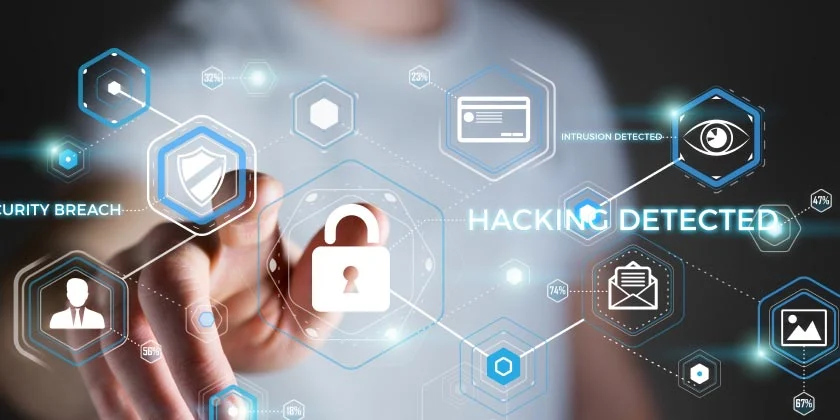








---
---
---



**Name : KRISHNAKRIPA VM**

**Organization : Entri Elevate**

**Date :25-09-2024**


---





## **1.Overview of Problem Statement:**
Cybersecurity is a crucial aspect in today’s digital landscape, where preventing and identifying attacks is of paramount importance. The given dataset contains information about network traffic, and the goal is to build a machine learning model to predict whether a given traffic event is an attack or normal behavior based on its features.

## **2.Objective:**
To develop a predictive model using machine learning algorithms to classify network traffic events as either normal or malicious (attack).

## **3.Data Description:**
⚫Source: UNSW Cybersecurity dataset : https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/

⚫:Features:

▶id: Unique identifier for each record.

▶dur: Duration of the event.

▶proto: Protocol used (e.g., UDP).

▶service: Service type.

▶state: Connection state.

▶spkts, dpkts: Source and destination packet counts.

▶sbytes, dbytes: Source and destination byte counts.

▶attack_cat: Attack category (if applicable).

▶label: Target column indicating attack (1) or normal (0).




## **4.Data Collection**
Data has been provided and imported. Next, we gained insights into the data distribution and patterns through initial checks and will continue with further analysis.



*IMPORTING NECESSARY LIBRARIES*

---



---


















In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
# from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score


*LOADING DATASET*

---



---



In [2]:
Data=pd.read_csv("/content/unsw-nb15-data (1).csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/unsw-nb15-data (1).csv'

## **5. Data Preprocessing - Data Cleaning:**

In [ ]:
print(f"First 5 Row of dataframe :\n========================= \n{Data.head()}")


In [ ]:

print(f"List of columns in dataframe :\n=========================\n {Data.columns}")



In [ ]:

print(f"The shape of dataframe\n=========================\n : {Data.shape}")


In [ ]:
#checking no of missing values in each column
Data.isnull().sum()

In [ ]:
# Identifying categorical columns
categorical_cols = Data.select_dtypes(include=['object']).columns

# One-hot encoding categorical features
data_encoded = pd.get_dummies(Data, columns=categorical_cols, drop_first=True)
data_encoded
# Checking for missing values
missing_values = data_encoded.isnull().sum()

# Handling missing values - drop or fill
# Option 1: Dropping rows with missing values
data_cleaned = data_encoded.dropna()

# Option 2: Filling missing values with mean/median/mode
Data.fillna(data_encoded.mode(), inplace=True)  # Example with median

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0.0,1.0,2.0,0.0,Normal,0.0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0.0,1.0,2.0,0.0,Normal,0.0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0.0,1.0,3.0,0.0,Normal,0.0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0.0,2.0,3.0,0.0,Normal,0.0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0.0,2.0,3.0,0.0,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106361,44583,1.796355,tcp,-,FIN,28,14,21670,764,22.823996,...,1,2,0,0,0.0,1.0,2.0,0.0,Normal,0.0
106362,44584,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0.0,1.0,1.0,1.0,Normal,0.0
106363,44585,0.710263,tcp,-,FIN,12,8,998,720,26.750654,...,1,2,0,0,0.0,18.0,2.0,0.0,Normal,0.0
106364,44586,0.681337,tcp,-,FIN,12,8,1006,720,27.886347,...,1,2,0,0,0.0,1.0,2.0,0.0,Normal,0.0


In [ ]:
data_encoded.isnull().sum()

,0
id,0
dur,0
spkts,0
dpkts,0
sbytes,0
...,...
state_no,0
attack_cat_Exploits,0
attack_cat_Fuzzers,0
attack_cat_Normal,0


There is no missing values in this dataset

In [ ]:
#distribution of attack and normal
Data['label'].value_counts()

,count
label,
0.0,81586
1.0,24779


OUTLIER DETECTION

VISUALIZATION

In [ ]:
def NumCat(Data):
    numericalFeatures=Data.select_dtypes(include=['number']).columns.tolist()
    categoricalFeatures=Data.select_dtypes(include=['object']).columns.tolist()

    return numericalFeatures,categoricalFeatures

numericalFeatures,categoricalFeatures = NumCat(Data)
numericalFeatures

['id',
 'dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'label']

The Feature : id
The Feature : dur
The Feature : spkts
The Feature : dpkts
The Feature : sbytes
The Feature : dbytes
The Feature : rate
The Feature : sttl
The Feature : dttl
The Feature : sload
The Feature : dload
The Feature : sloss
The Feature : dloss
The Feature : sinpkt
The Feature : dinpkt
The Feature : sjit
The Feature : djit
The Feature : swin
The Feature : stcpb
The Feature : dtcpb
The Feature : dwin
The Feature : tcprtt


<ipython-input-10-e0b20b81012f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,4))


The Feature : synack
The Feature : ackdat
The Feature : smean
The Feature : dmean
The Feature : trans_depth
The Feature : response_body_len
The Feature : ct_srv_src
The Feature : ct_state_ttl
The Feature : ct_dst_ltm
The Feature : ct_src_dport_ltm
The Feature : ct_dst_sport_ltm
The Feature : ct_dst_src_ltm
The Feature : is_ftp_login
The Feature : ct_ftp_cmd
The Feature : ct_flw_http_mthd
The Feature : ct_src_ltm
The Feature : ct_srv_dst
The Feature : is_sm_ips_ports
The Feature : label


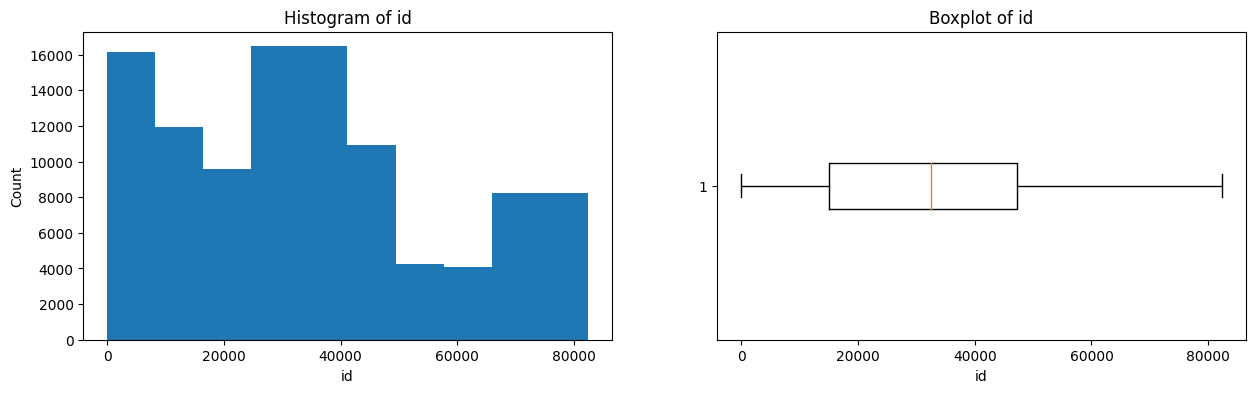

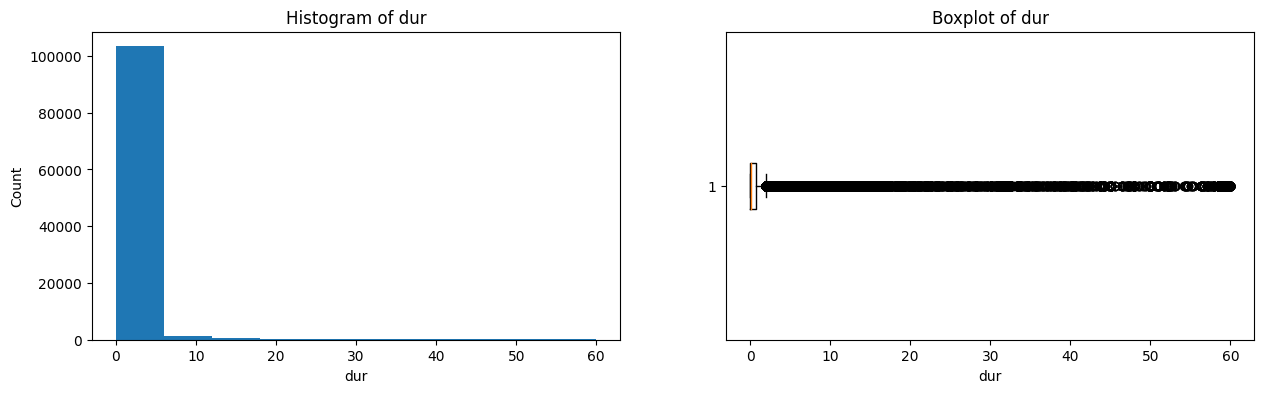

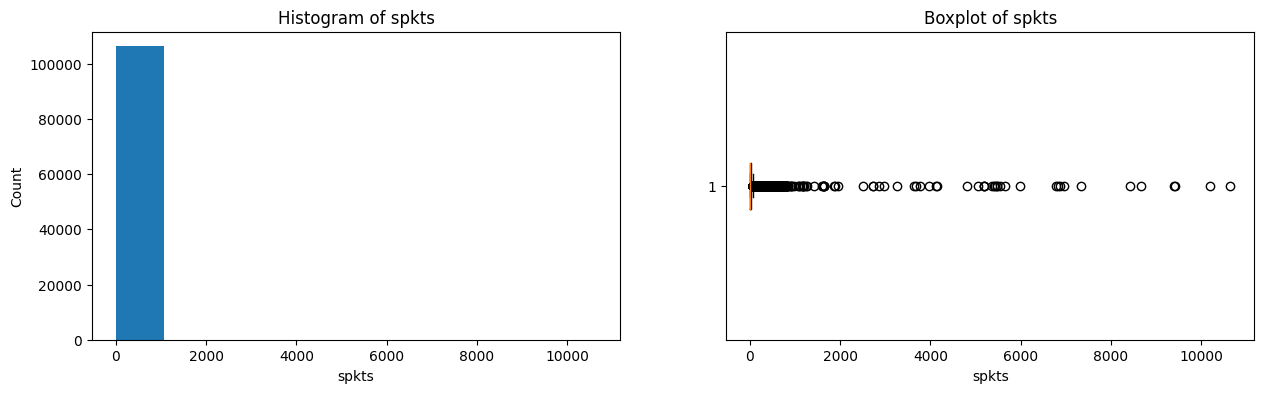

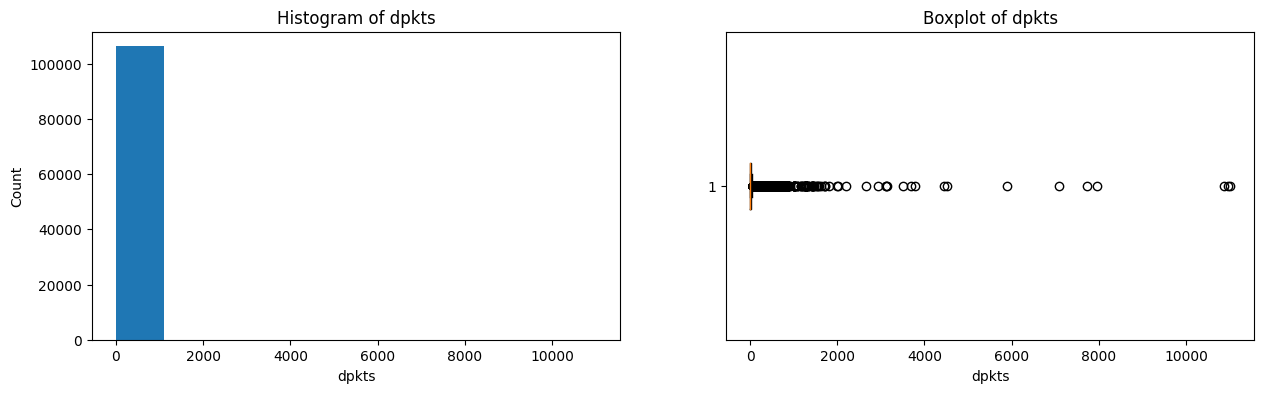

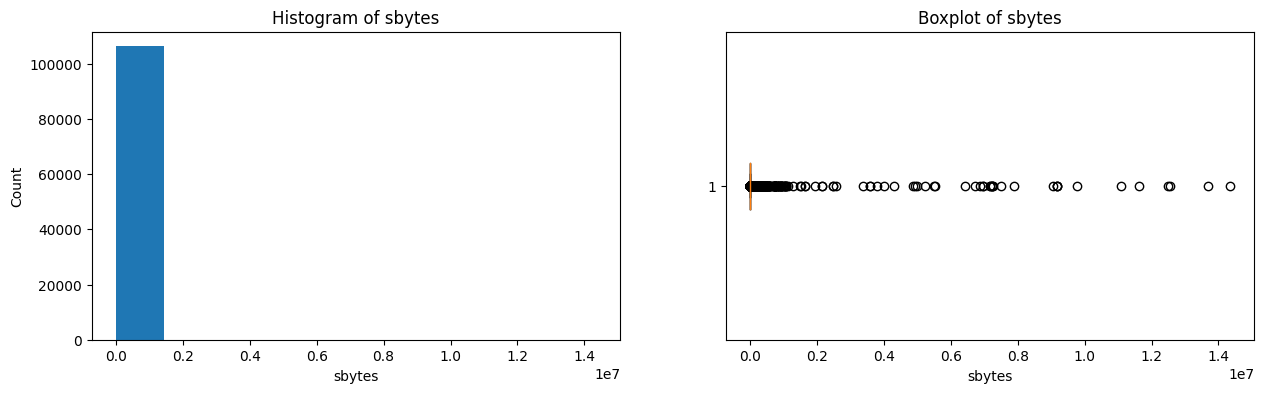

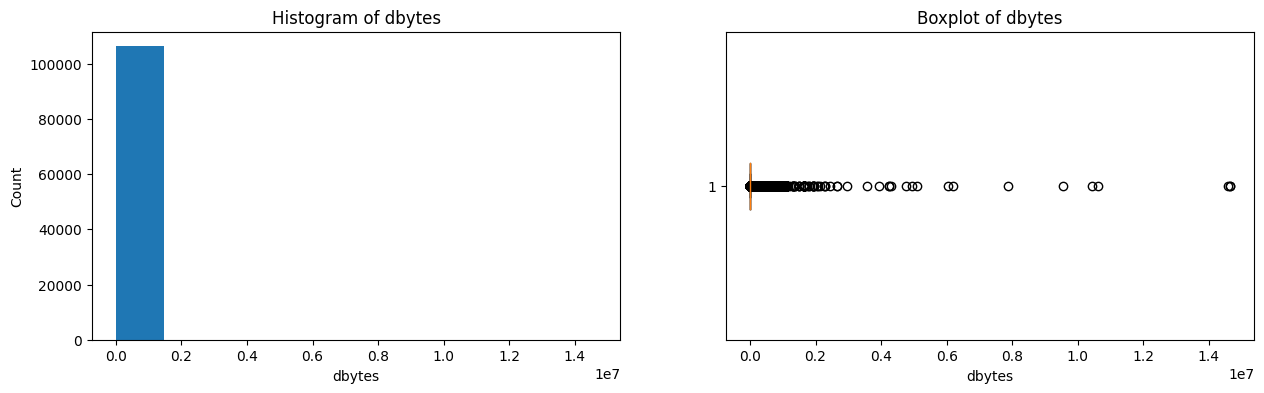

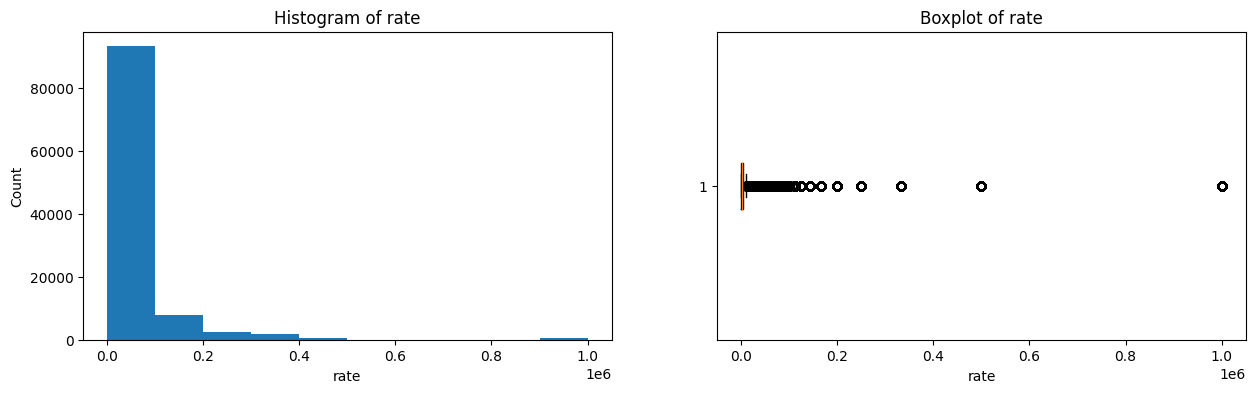

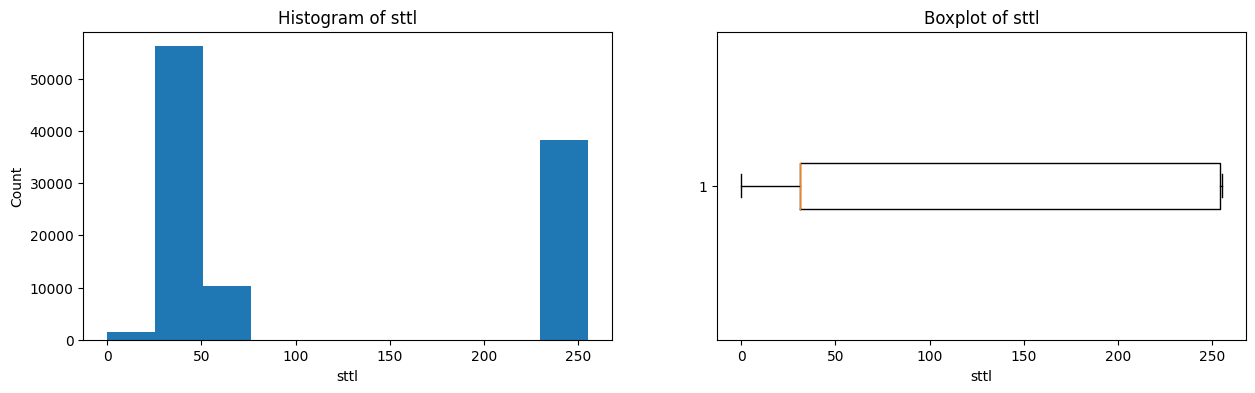

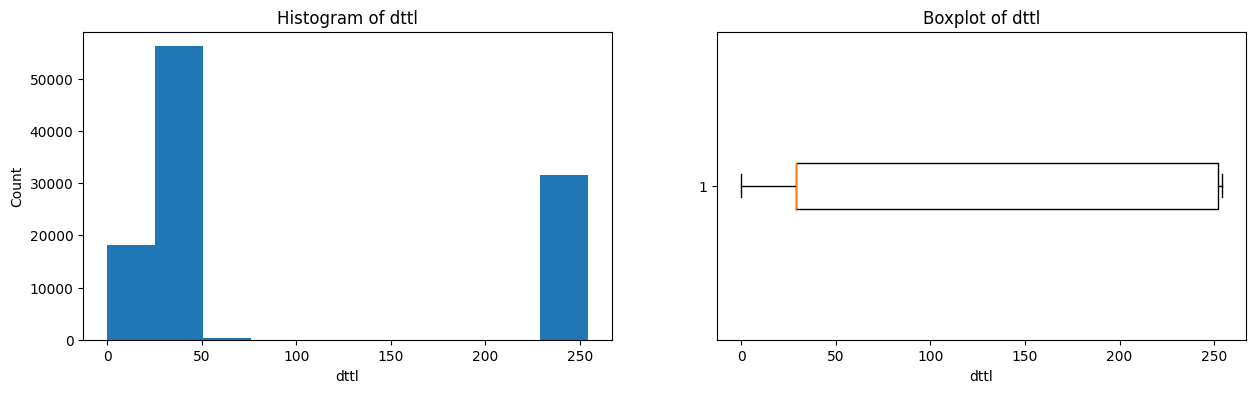

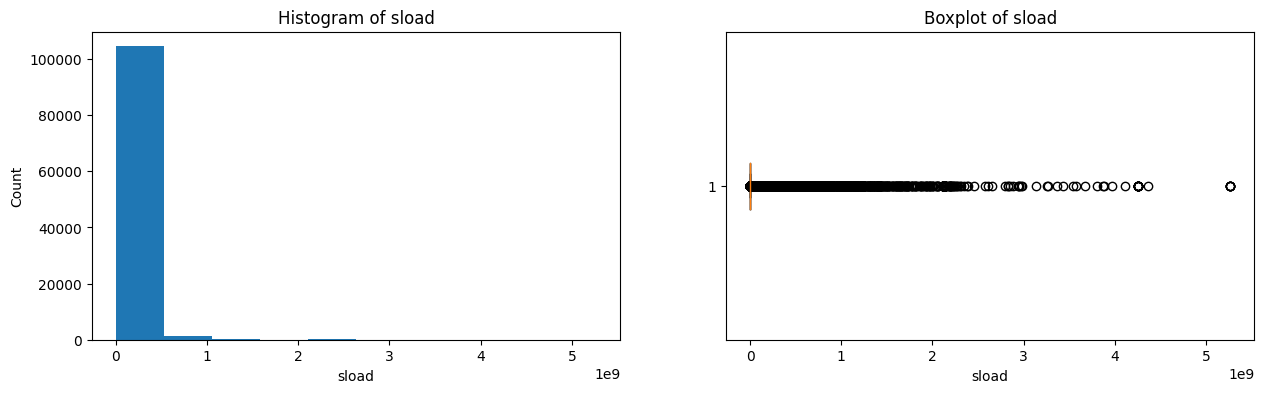

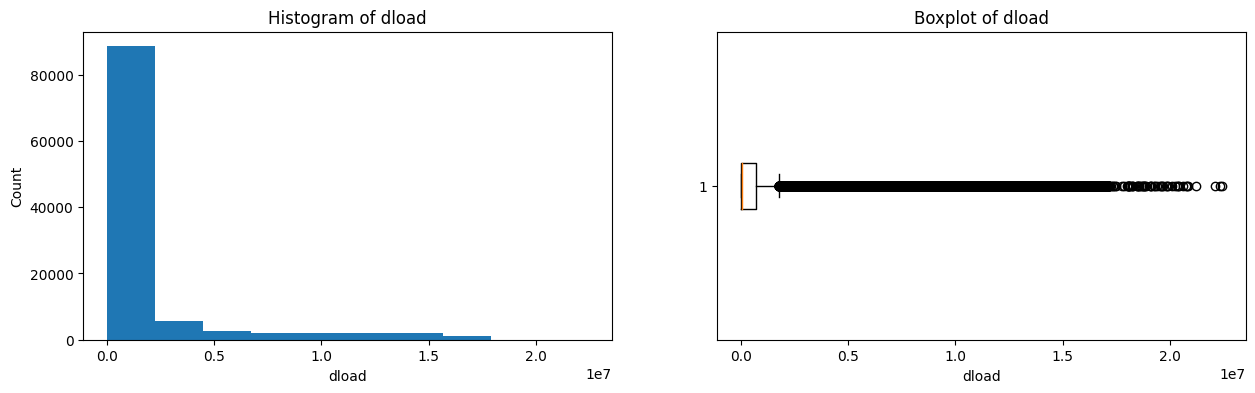

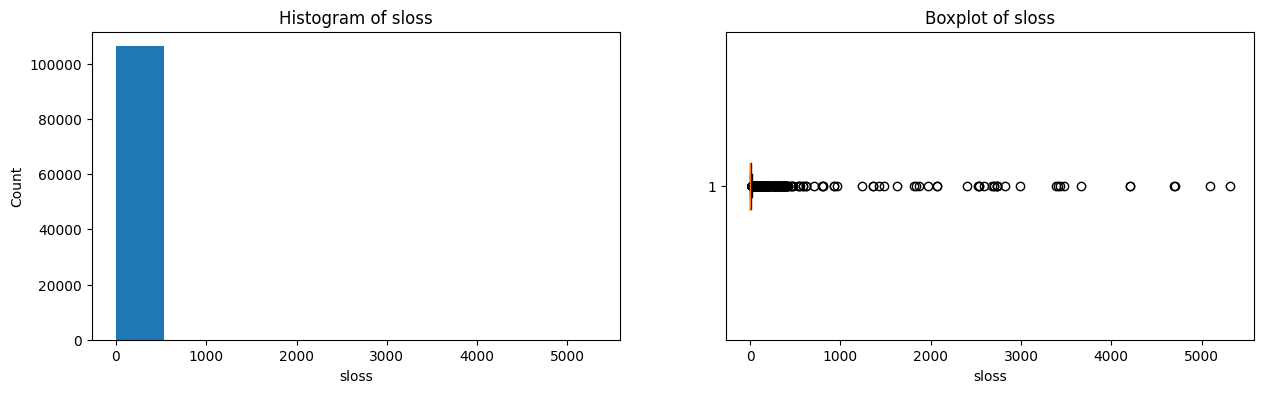

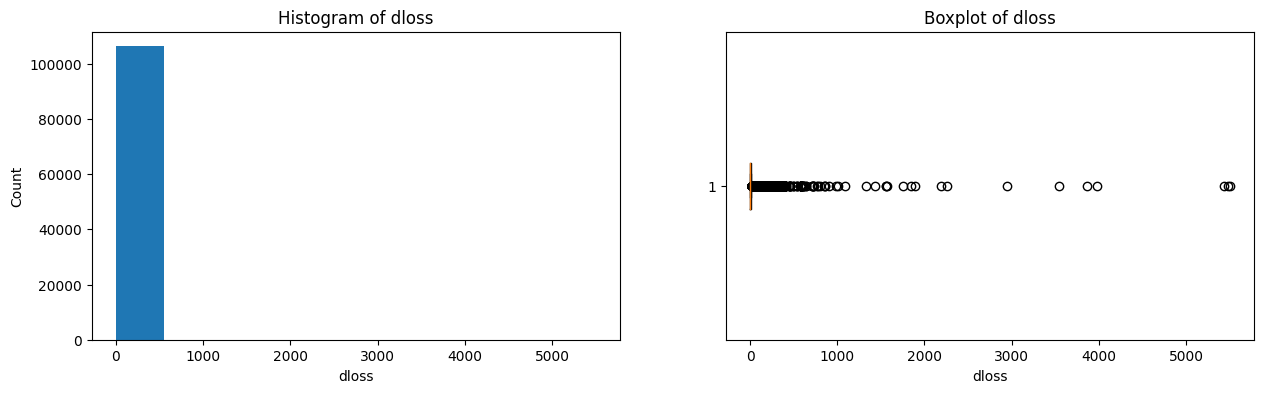

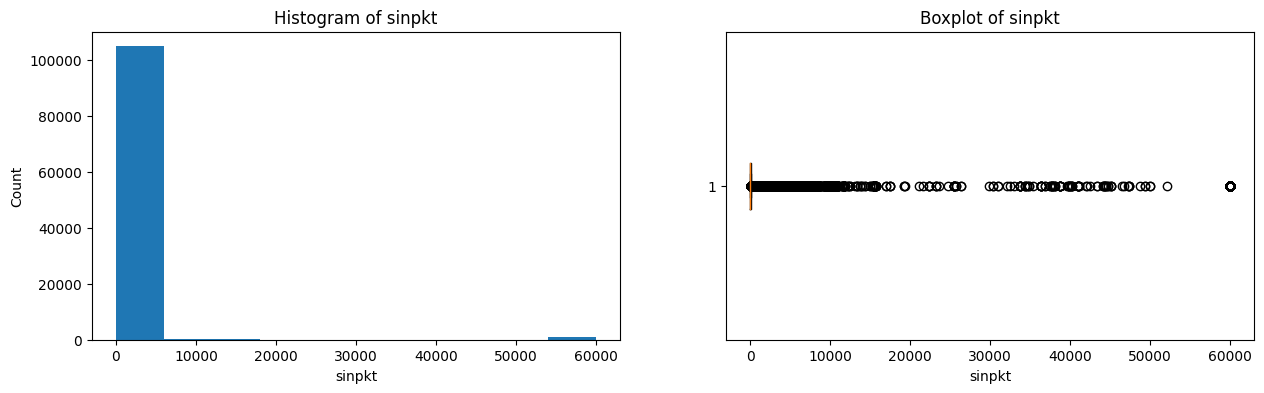

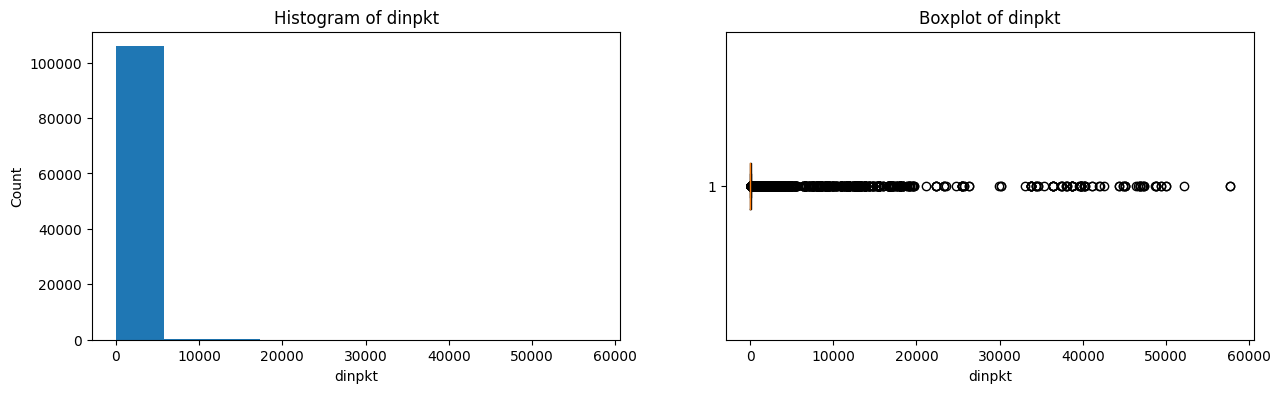

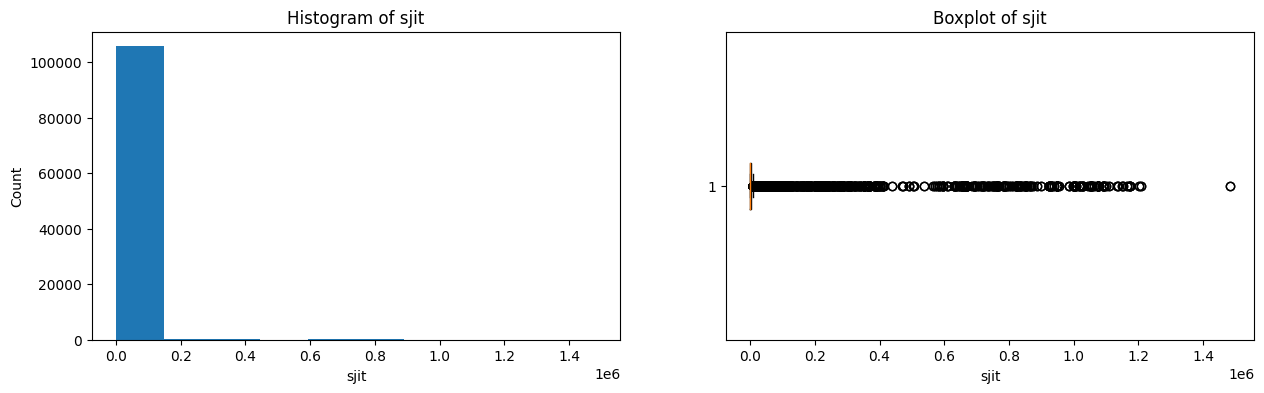

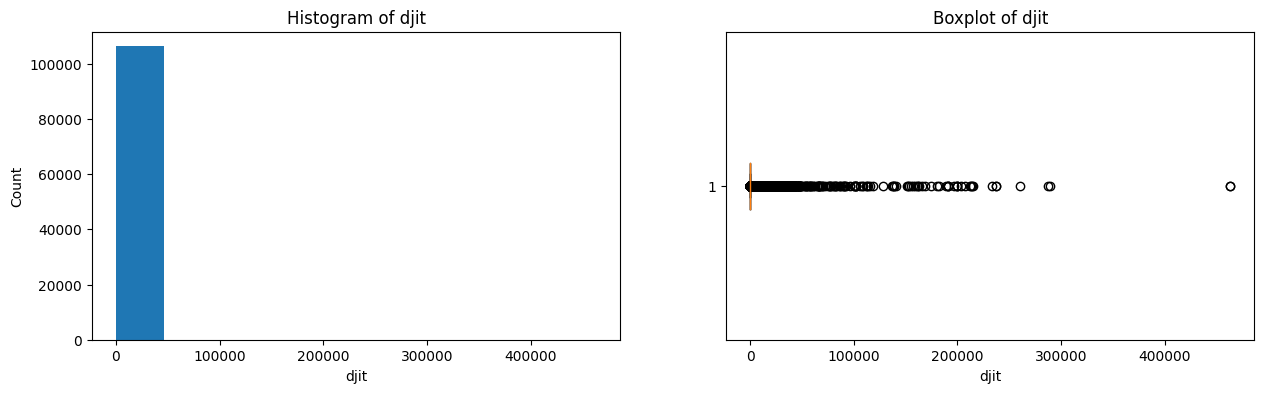

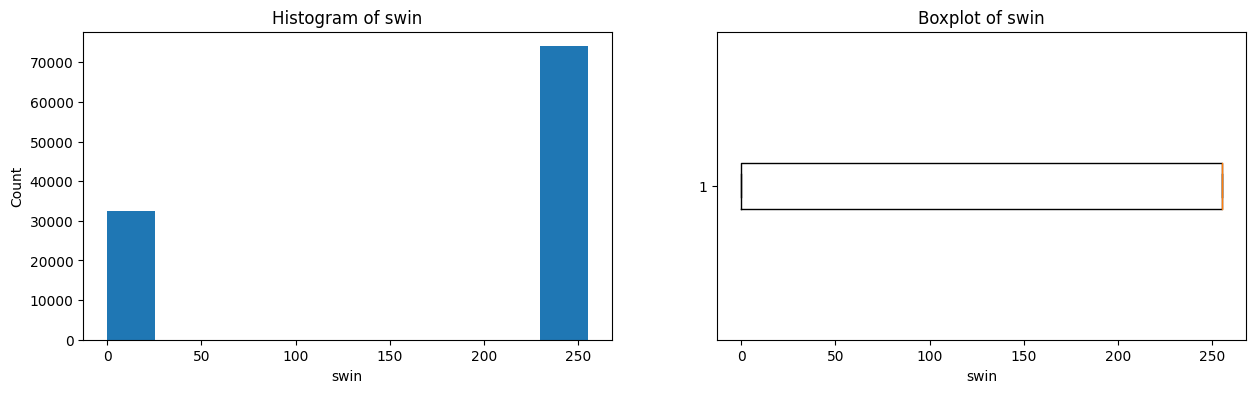

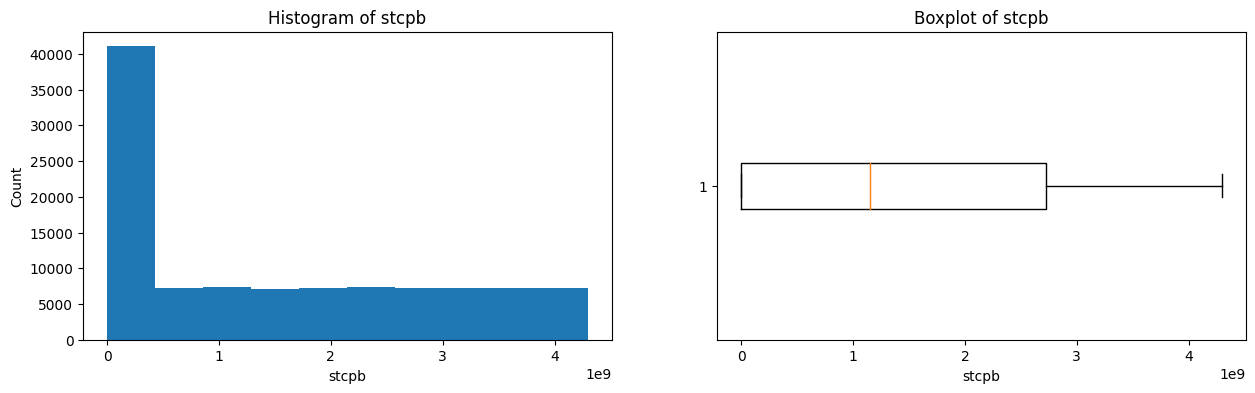

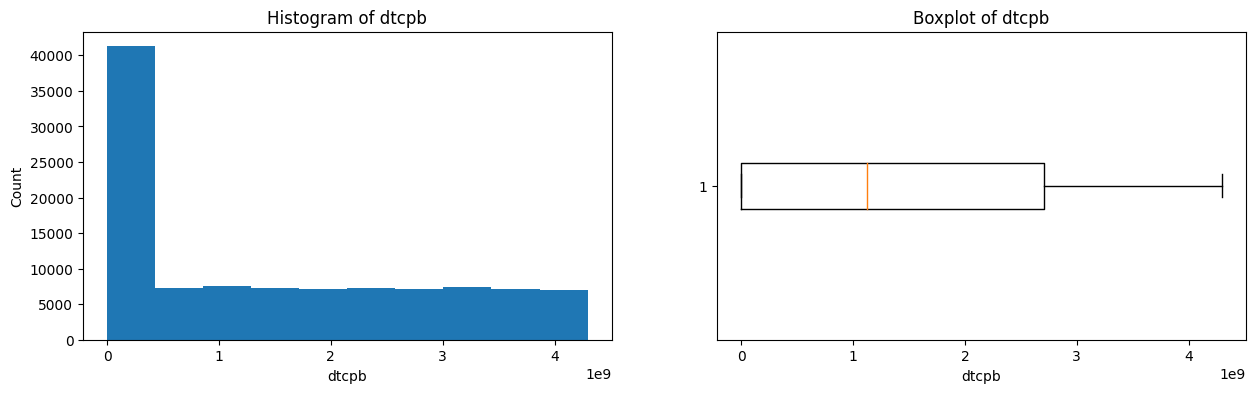

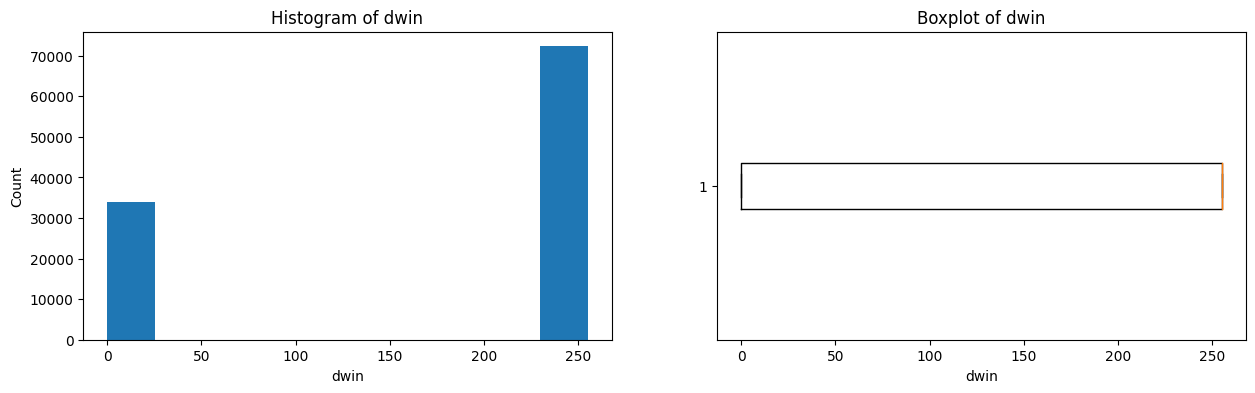

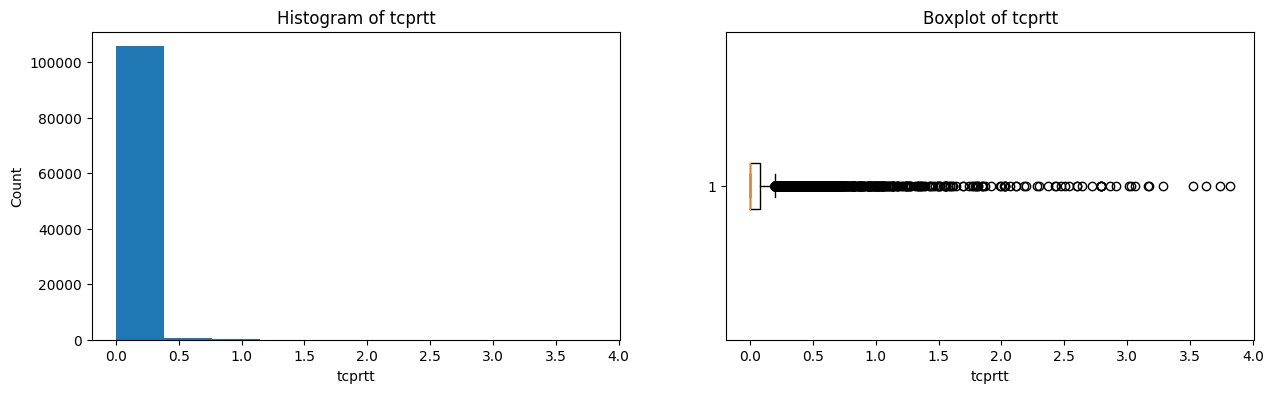

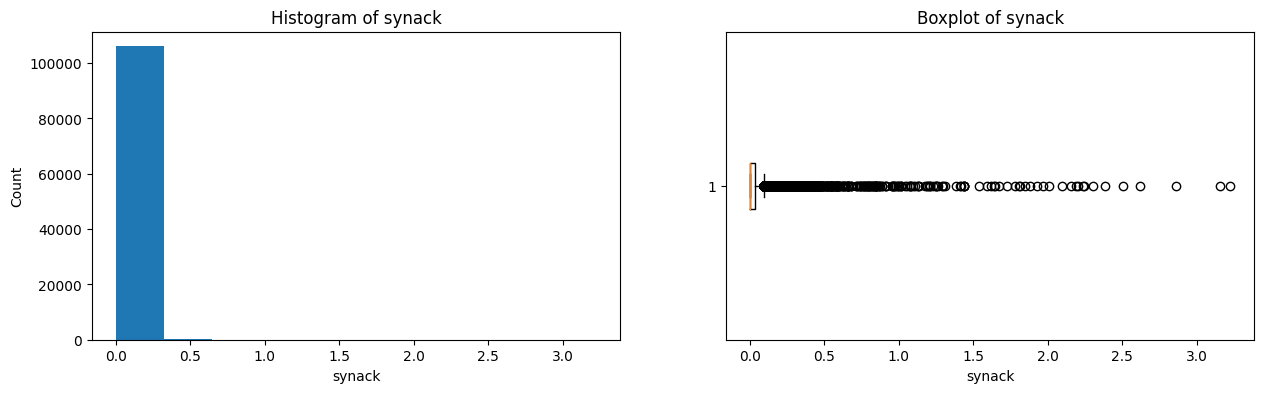

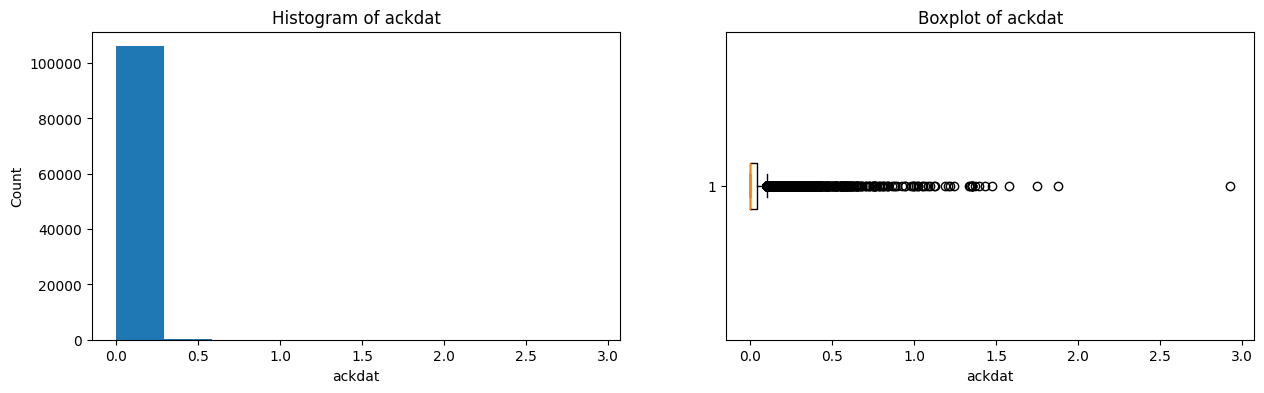

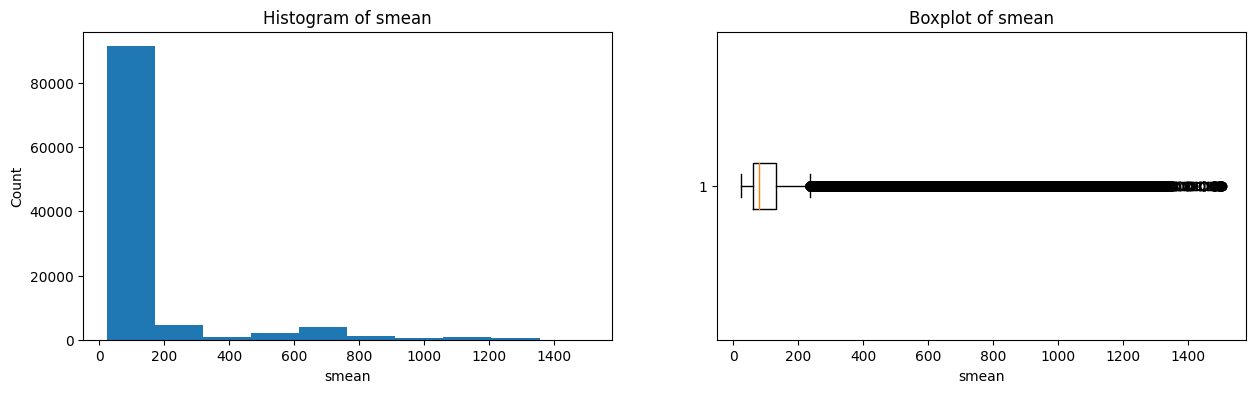

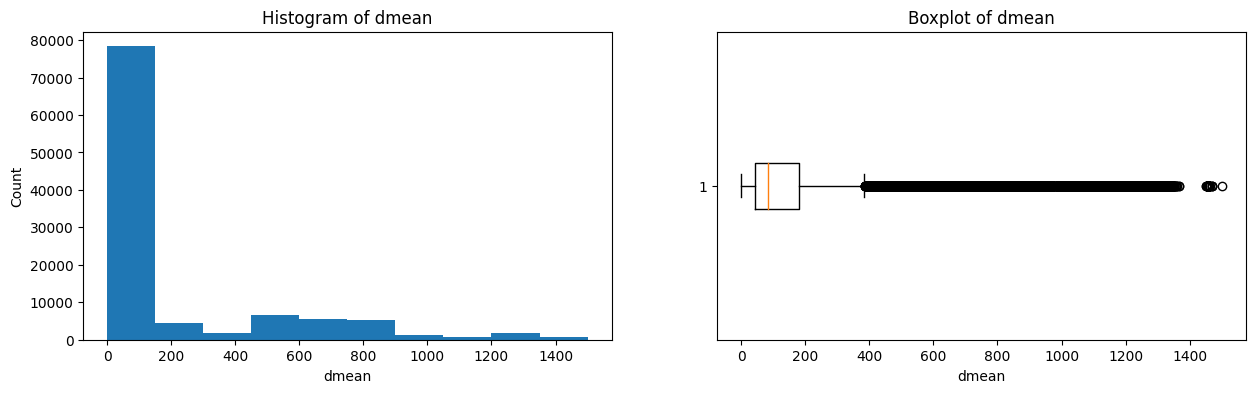

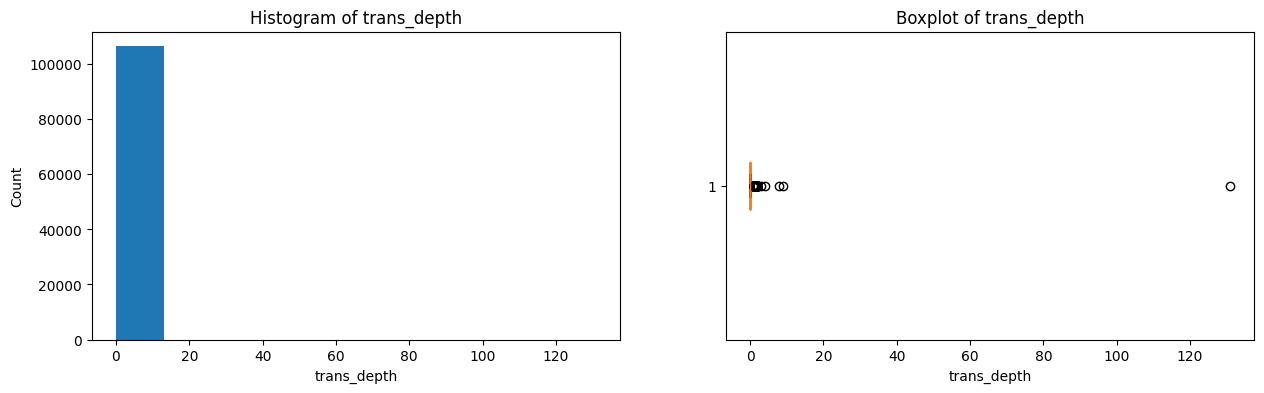

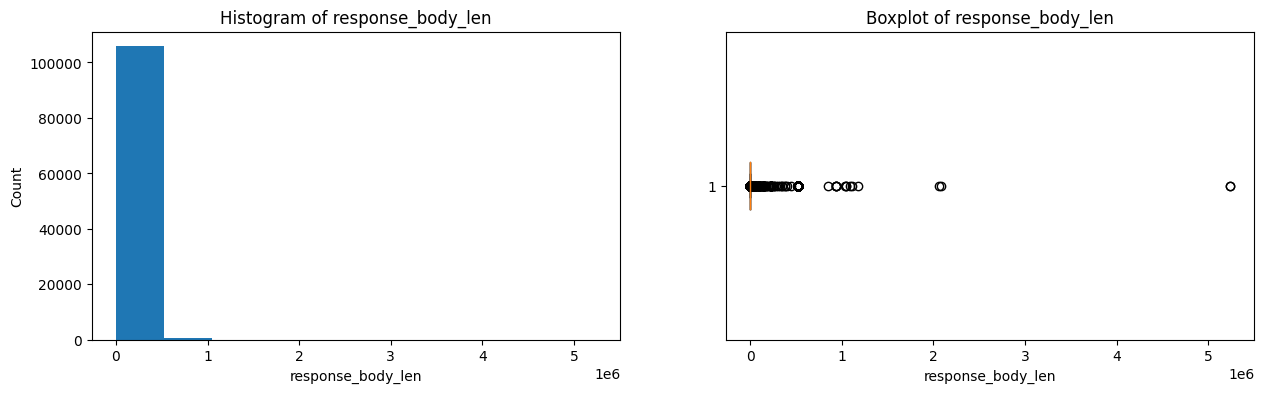

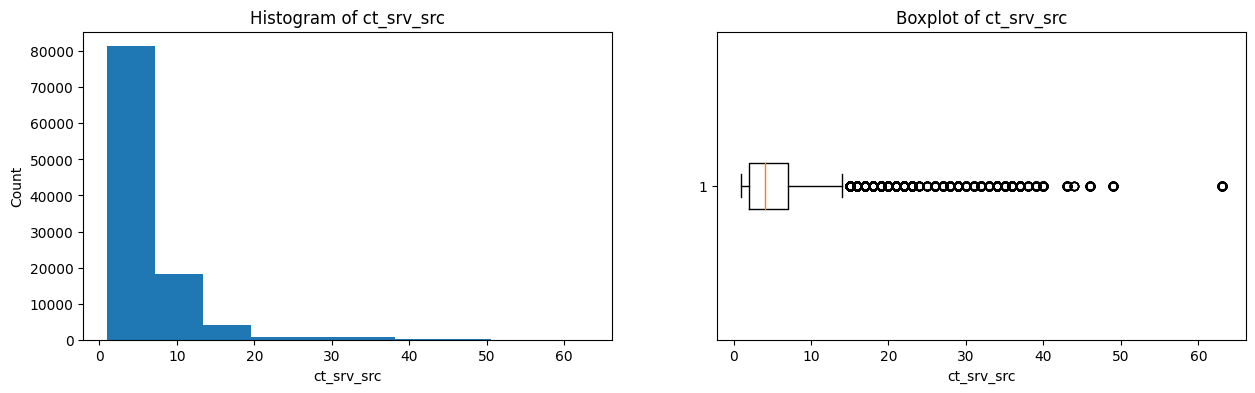

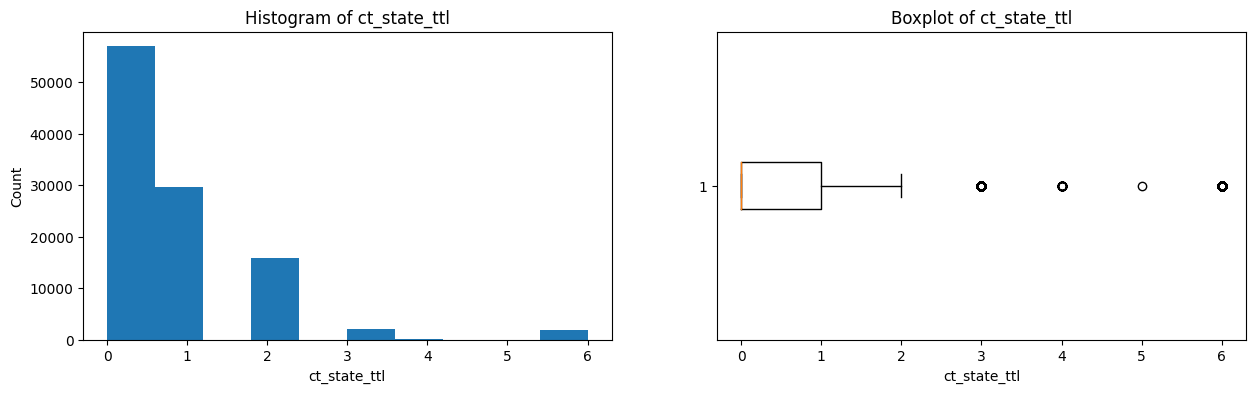

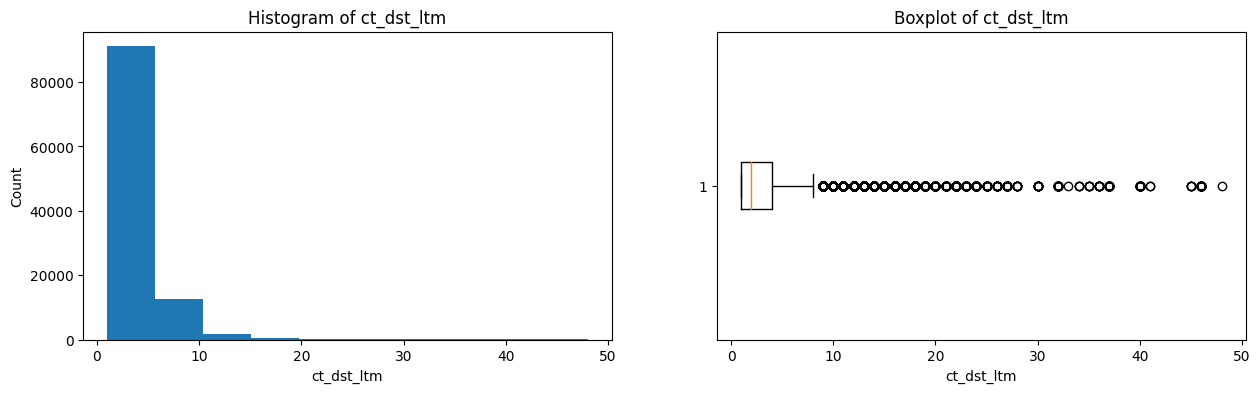

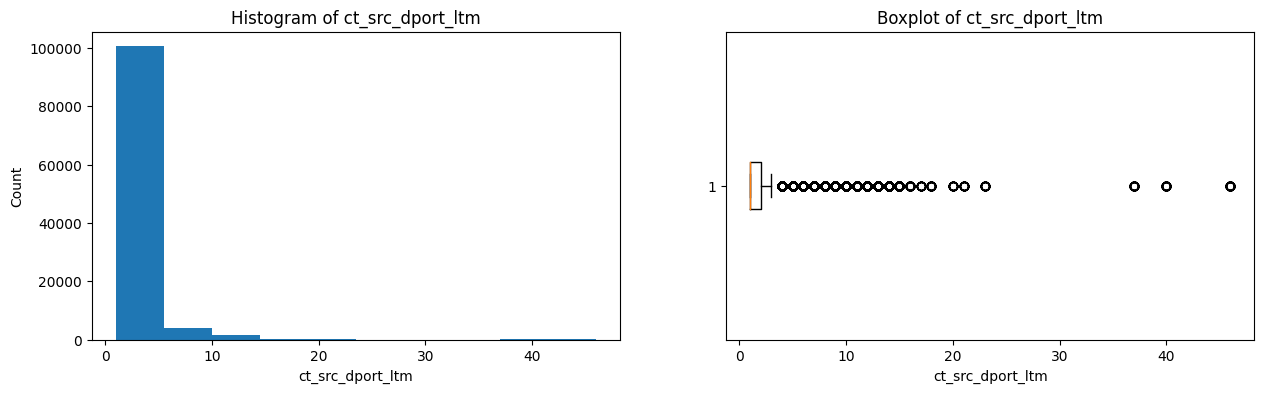

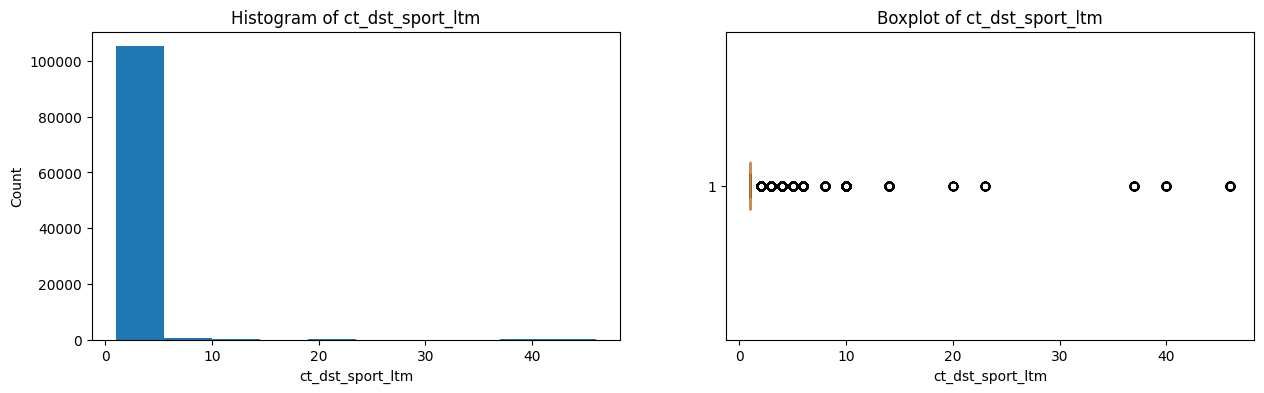

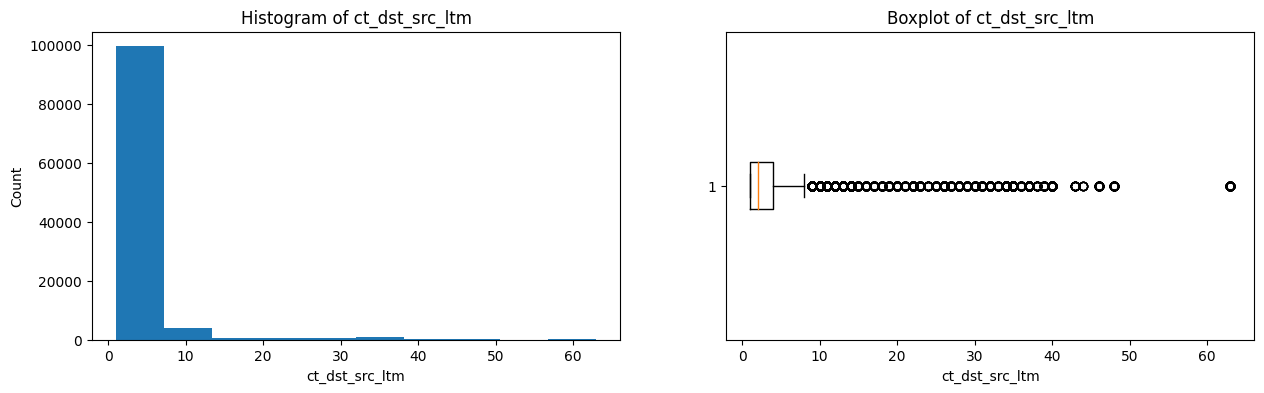

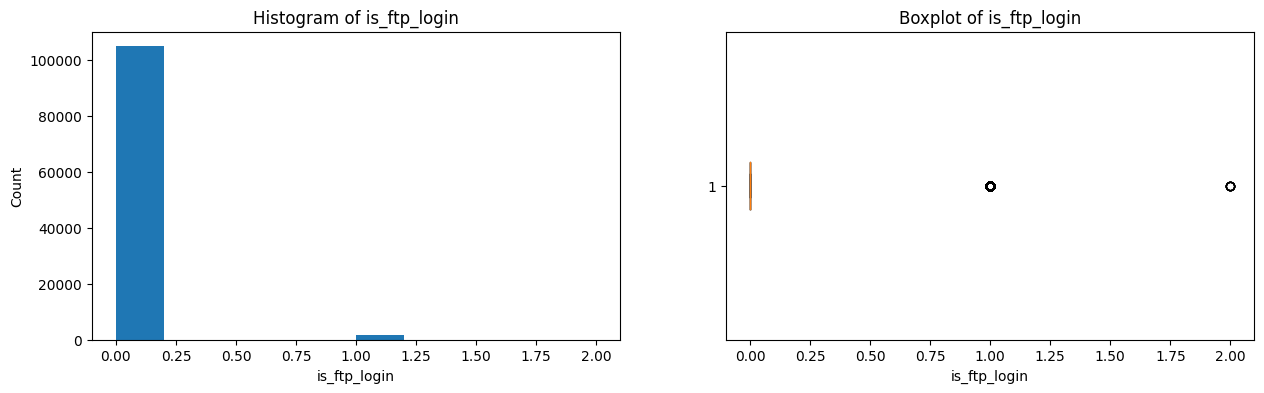

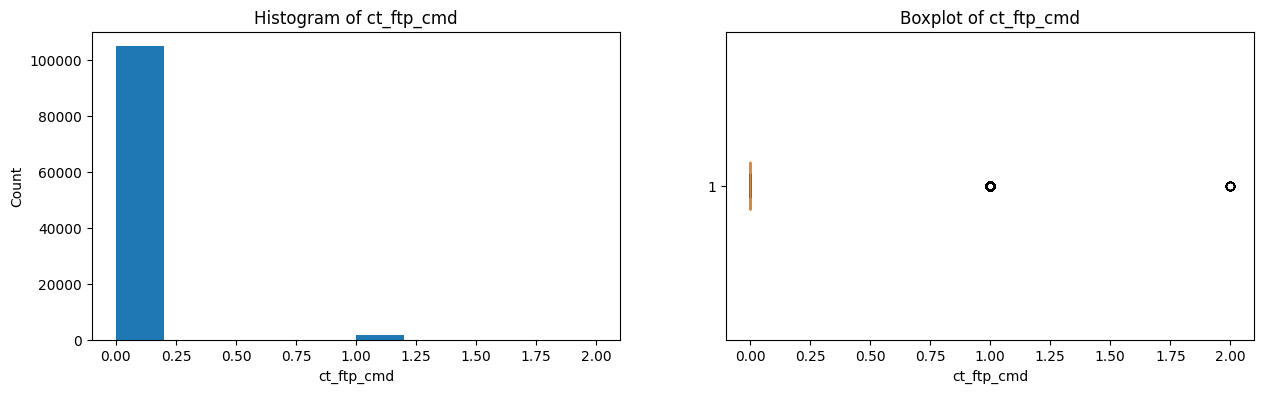

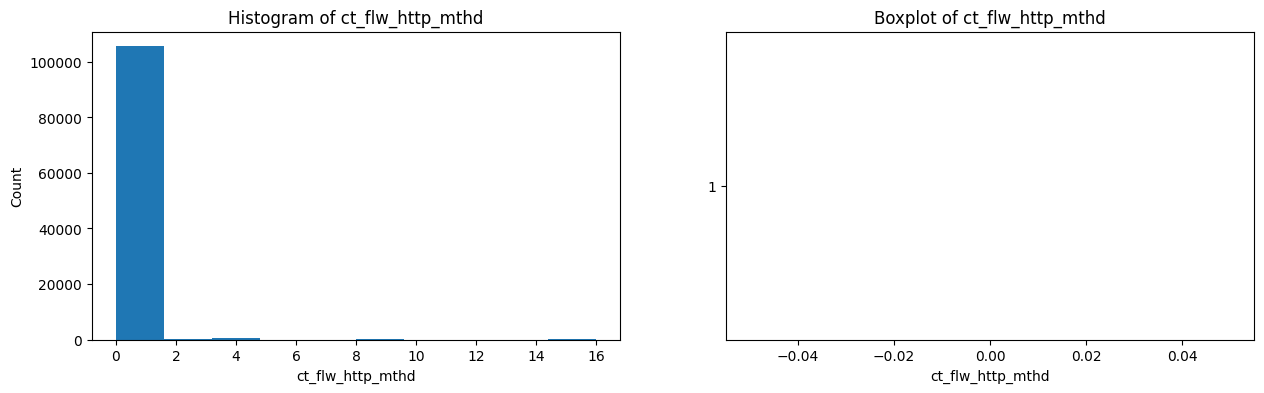

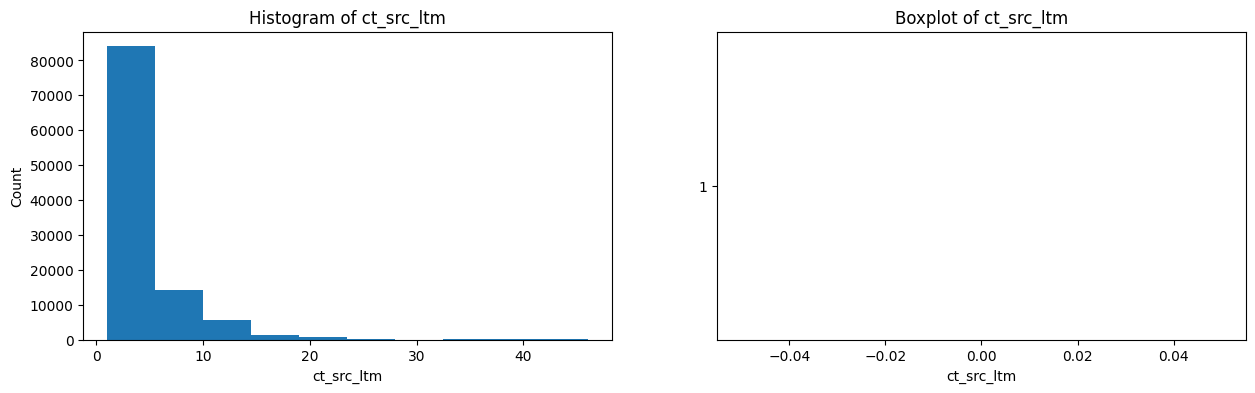

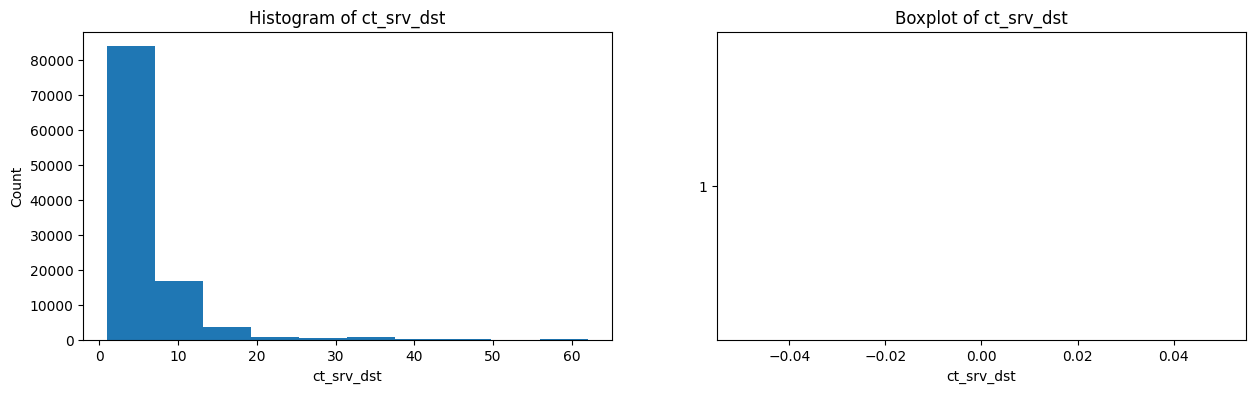

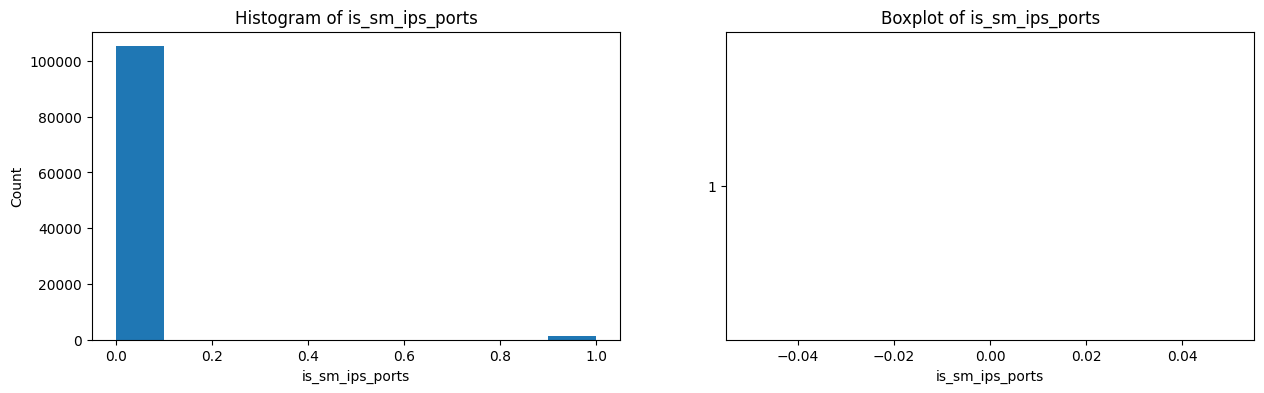

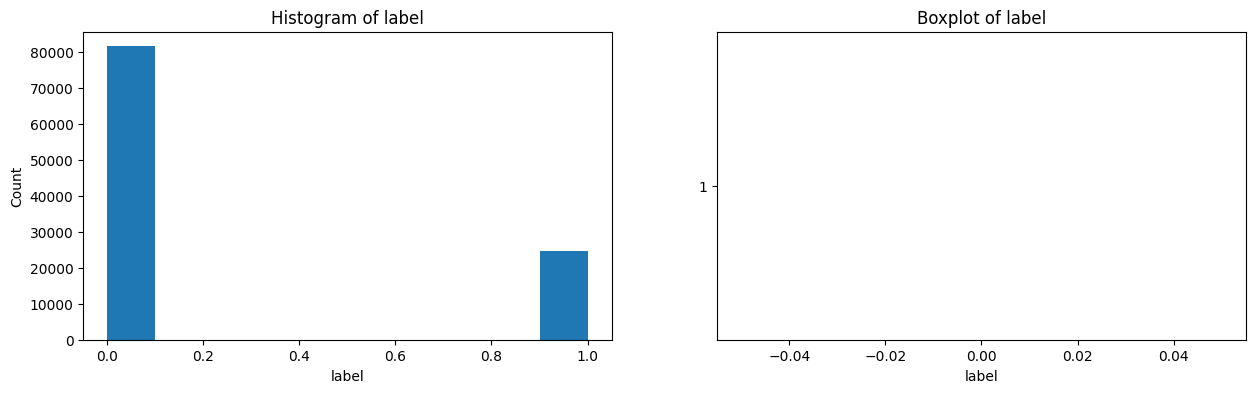

In [ ]:

for col in numericalFeatures:
    print(f"The Feature : {col}")
    plt.figure(figsize=(15,4))

    plt.subplot(1,2,1)
    Data[col].hist(grid=False)
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    plt.boxplot(Data[col],vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

In [ ]:
# Using Z-score to detect outliers
from scipy import stats
z_scores = np.abs(stats.zscore(Data.select_dtypes(include=np.number)))

# Removing rows with Z-score greater than 3
data_cleaned = Data[(z_scores < 3).all(axis=1)]

In [ ]:
Data.shape

(106366, 45)

In [ ]:
data_cleaned.shape

(0, 45)

In [ ]:
data_cleaned['label'].value_counts()

,count
label,


In [ ]:
Data['label'].value_counts()

,count
label,
0.0,81586
1.0,24779


In [ ]:
numeric_data = Data.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Print the correlation matrix
print(corr_matrix)


                         id       dur     spkts     dpkts    sbytes    dbytes  \
id                 1.000000  0.012283 -0.050889 -0.080730  0.000531 -0.057332   
dur                0.012283  1.000000  0.260305  0.216968  0.195590  0.189904   
spkts             -0.050889  0.260305  1.000000  0.468876  0.916246  0.324614   
dpkts             -0.080730  0.216968  0.468876  1.000000  0.145936  0.974647   
sbytes             0.000531  0.195590  0.916246  0.145936  1.000000  0.012432   
dbytes            -0.057332  0.189904  0.324614  0.974647  0.012432  1.000000   
rate               0.073501 -0.070765 -0.064497 -0.077003 -0.015253 -0.047247   
sttl               0.409469  0.059649 -0.093851 -0.161039  0.003613 -0.115213   
dttl               0.411635  0.054684 -0.006956 -0.055395  0.045913 -0.046852   
sload              0.089554 -0.050769 -0.047468 -0.056869 -0.009947 -0.034742   
dload             -0.198180 -0.089557  0.100560  0.137669 -0.011887  0.105450   
sloss             -0.010240 

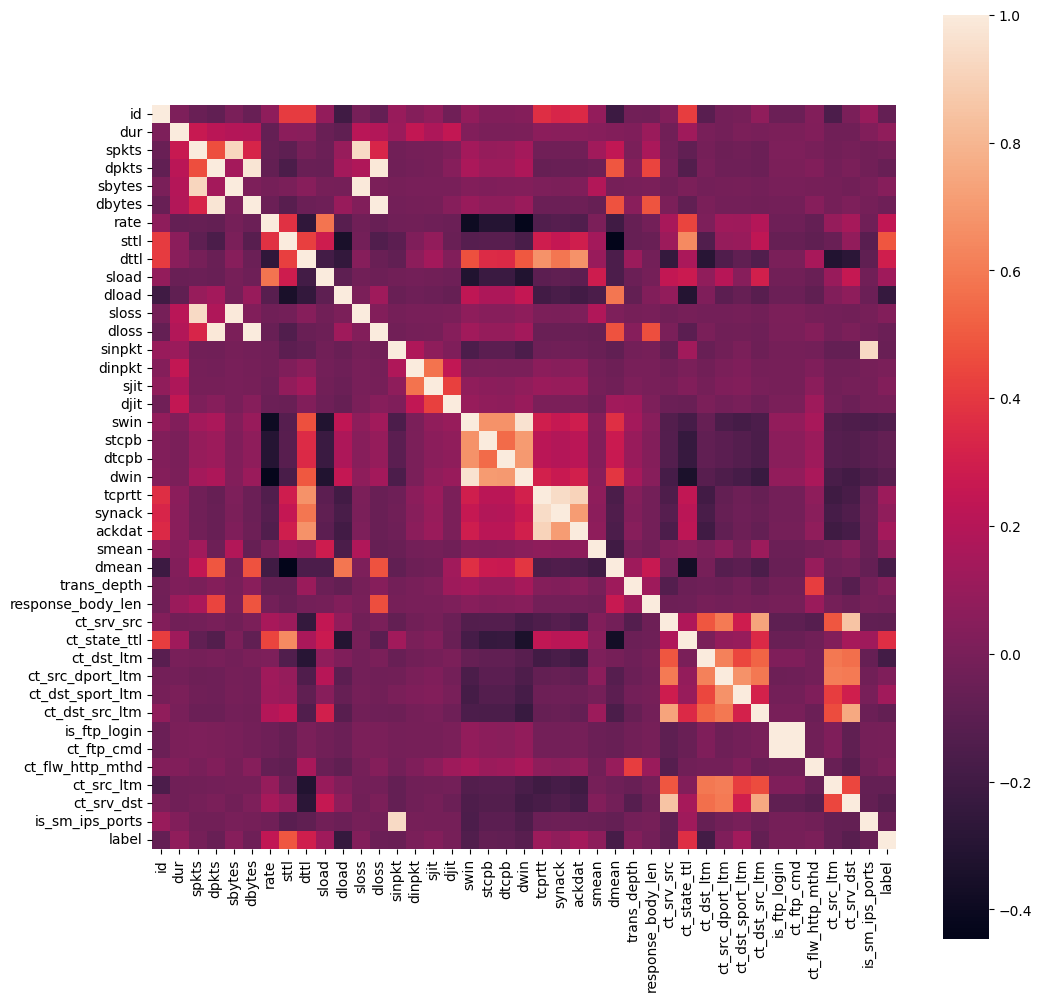

In [ ]:

# correlation matrix


plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, square=True)
plt.show()

In [ ]:
# Getting and printing high correlated features
limit = 0.9

columns = corr_matrix.columns
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_matrix.iloc[i, j]}")

spkts                sbytes               0.9162459395833453
spkts                sloss                0.9361078676148822
dpkts                dbytes               0.974647186931245
dpkts                dloss                0.9855319492998151
sbytes               sloss                0.99238996907151
dbytes               dloss                0.9949090217683159
sinpkt               is_sm_ips_ports      0.9340637665782648
swin                 dwin                 0.9639619705015294
tcprtt               synack               0.942055961774017
tcprtt               ackdat               0.9040369706475754
is_ftp_login         ct_ftp_cmd           0.9974747612368987


In [ ]:
#sns.set_style("whitegrid")
#sns.pairplot(data=Data, vars=['sbytes', 'spkts'])
#plt.show()

In [ ]:
#sns.set_style('whitegrid')
#sns.pairplot(data=Data, vars=['dpkts', 'dbytes', 'dloss'])
#plt.show()

In [ ]:
#sns.set_style('whitegrid')
#sns.pairplot(Data, vars=['sbytes',' sloss '])
#sns.pairplot(Data, vars=['sinpkt', 'is_sm_ips_ports'])
#plt.show()

## 7.Feature Engineering

In [ ]:
# Identifying categorical columns
categorical_cols = Data.select_dtypes(include=['object']).columns

# One-hot encoding categorical features
data_encoded = pd.get_dummies(Data, columns=categorical_cols, drop_first=True)
data_encoded

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Normal,attack_cat_Reconnaissance
0,1,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,...,True,False,False,False,False,False,False,False,True,False
1,2,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,...,True,False,False,False,False,False,False,False,True,False
2,3,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,...,True,False,False,False,False,False,False,False,True,False
3,4,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,...,True,False,False,False,False,False,False,False,True,False
4,5,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106361,44583,1.796355,28,14,21670,764,22.823996,254,252,9.306401e+04,...,False,False,False,False,False,False,False,False,True,False
106362,44584,0.000000,1,0,46,0,0.000000,0,0,0.000000e+00,...,True,False,False,False,False,False,False,False,True,False
106363,44585,0.710263,12,8,998,720,26.750654,254,252,1.030604e+04,...,False,False,False,False,False,False,False,False,True,False
106364,44586,0.681337,12,8,1006,720,27.886347,254,252,1.083751e+04,...,False,False,False,False,False,False,False,False,True,False


## **7. Feature Selection:**
We'll use methods like RandomForest and SelectKBest to choose the most important features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Random Forest for feature importance
X = data_encoded.drop('label', axis=1)
y = data_encoded['label']

model = RandomForestClassifier()
model.fit(X, y)

# Feature importance
importance = pd.Series(model.feature_importances_, index=X.columns)
important_features = importance.nlargest(10)
print(important_features)

# Using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
print(X.columns[selector.get_support()])


attack_cat_Normal      0.345528
id                     0.069367
ct_state_ttl           0.052942
attack_cat_Exploits    0.050587
attack_cat_Fuzzers     0.048289
sttl                   0.039796
ct_dst_src_ltm         0.030248
sload                  0.025534
dpkts                  0.019716
dload                  0.018965
dtype: float64
Index(['rate', 'sttl', 'dttl', 'ct_state_ttl', 'proto_unas', 'state_INT',
       'attack_cat_Exploits', 'attack_cat_Fuzzers', 'attack_cat_Normal',
       'attack_cat_Reconnaissance'],
      dtype='object')


## **8. Split Data into Training and Testing Sets:**
We'll split the dataset into training and testing subsets.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **9. Feature Scaling:**
Scale the data using StandardScaler or MinMaxScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you have your data in 'data_encoded' and target variable in 'label'
X = data_encoded.drop('label', axis=1)
y = data_encoded['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Check for missing values in X_train_scaled and handle them (e.g., with imputation)
X_train_scaled = pd.DataFrame(X_train_scaled).fillna(pd.DataFrame(X_train_scaled).mean()).values

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)



LogisticRegression()

In [ ]:
# SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)


SVC()

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)


GaussianNB()

## **11. Model Evaluation:**
We'll evaluate the models using classification metrics.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluation for Logistic Regression
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

# Similarly, evaluate other models


Logistic Regression Metrics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16236
         1.0       1.00      1.00      1.00      5038

    accuracy                           1.00     21274
   macro avg       1.00      1.00      1.00     21274
weighted avg       1.00      1.00      1.00     21274

[[16236     0]
 [    1  5037]]


## **12. Hyperparameter Tuning:**
We'll tune the model hyperparameters using GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
}

grid_rf = GridSearchCV(rf, param_grid, cv=5)
grid_rf.fit(X_train_scaled, y_train)

# Best parameters
print(grid_rf.best_params_)


{'max_depth': 10, 'n_estimators': 200}


## **13. Save the Model:**
We can save the model using joblib.

In [ ]:
import joblib

# Save the model
joblib.dump(log_reg, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

## **14. Test with Unseen Data:**
To test with new data:

In [ ]:
# Load the saved model
loaded_model = joblib.load('logistic_regression_model.pkl')

# Predict on new unseen data
new_data = X_test_scaled[0].reshape(1, -1)  # Example with one row
prediction = loaded_model.predict(new_data)
print("Prediction:", prediction)


Prediction: [0.]


In [ ]:
#seperating the data for analysis
Normal=Data[Data.label==0]
Attack=Data[Data.label==1]

the prediction 0 means the model predicts the instance as normal traffic